In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_model=keras.applications.MobileNetV2() #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
preds=keras.layers.Dense(1,activation='sigmoid')(x) #final layer with softmax activation
model=keras.Model(inputs=base_model.input,outputs=preds)
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

In [3]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [4]:
!ls dataset/images/

test  train  val


In [5]:
!ls dataset/images/train

clean  messy


In [6]:
BATCH_SIZE = 4
IMG_SIZE = (224, 224)
EPOCHS = 20

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        "dataset/images/train",
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary')

Found 192 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        "dataset/images/val",
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary')

Found 20 images belonging to 2 classes.


In [9]:
model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=train_generator)

Epoch 1/20
48/48 [==============================] - 2s 40ms/step - loss: 0.6901 - accuracy: 0.6719 - val_loss: 0.6833 - val_accuracy: 0.6302
Epoch 2/20
48/48 [==============================] - 1s 30ms/step - loss: 0.6718 - accuracy: 0.9010 - val_loss: 0.6834 - val_accuracy: 0.6458
Epoch 3/20
48/48 [==============================] - 1s 30ms/step - loss: 0.6631 - accuracy: 0.8958 - val_loss: 0.6678 - val_accuracy: 0.8281
Epoch 4/20
48/48 [==============================] - 1s 31ms/step - loss: 0.6599 - accuracy: 0.8906 - val_loss: 0.6642 - val_accuracy: 0.8906
Epoch 5/20
48/48 [==============================] - 1s 30ms/step - loss: 0.6543 - accuracy: 0.9219 - val_loss: 0.6715 - val_accuracy: 0.7448
Epoch 6/20
48/48 [==============================] - 1s 30ms/step - loss: 0.6498 - accuracy: 0.9427 - val_loss: 0.6540 - val_accuracy: 0.9375
Epoch 7/20
48/48 [==============================] - 1s 30ms/step - loss: 0.6509 - accuracy: 0.9062 - val_loss: 0.6471 - val_accuracy: 0.9531
Epoch 8/20
48

In [10]:
model.evaluate(train_generator)

48/48 [==============================] - 0s 9ms/step - loss: 0.6264 - accuracy: 0.9167


[0.6264212727546692, 0.9166666865348816]

In [11]:
model.evaluate(validation_generator)

5/5 [==============================] - 0s 8ms/step - loss: 0.6312 - accuracy: 0.9000


[0.6312319040298462, 0.8999999761581421]

In [12]:
from PIL import Image

('Clean', 0.4581815)


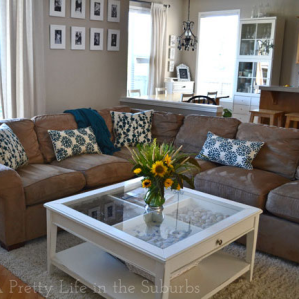

In [13]:
def get_preds(img):
    img = img.resize((224,224))
    img = np.array(img)
    img = img / 255
    output = model.predict(np.expand_dims(np.array(img), axis=0))[0][0]
    if output < 0.5:
        return "Clean", output
    else:
        return "Messy", output

    
img = Image.open("dataset/test/0.png")
print(get_preds(img))
img

('Messy', 0.5422521)


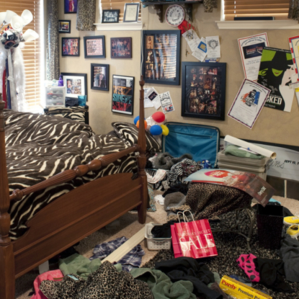

In [14]:
img = Image.open("dataset/test/8.png")
print(get_preds(img))
img

('Messy', 0.54225224)


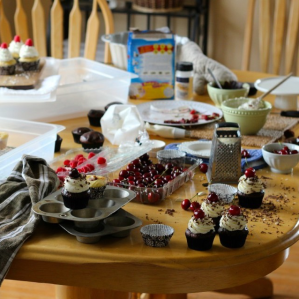

In [15]:
img = Image.open("dataset/test/7.png")
print(get_preds(img))
img

In [19]:
keras.models.save_model(model, "models/keras_model.h5")
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "models/tfjs_model")

/home/d/work/dk/cleanvsmessy/env/lib/python3.6/site-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
